In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/RFID_Capstone/11x11Ouput/Condense_Data.csv')
data.head()

,RSSI_sd1,RSSI_mean1,RSSI_sd2,RSSI_mean2,RSSI_sd3,RSSI_mean3,RSSI_sd4,RSSI_mean4,X,Y
0,0.641192,-56.827586,1.629036,-61.379310,1.451936,-66.965517,1.568278,-63.896552,4,0
1,0.924029,-65.758621,0.514498,-46.586207,31.500867,-43.344828,25.264461,-55.241379,10,0
2,0.626412,-64.428571,0.402979,-52.321429,2.202062,-64.357143,1.690086,-64.964286,7,0
3,0.679335,-48.678571,16.852237,-60.642857,2.384387,-59.750000,0.985091,-64.392857,1,0
4,0.862500,-62.321429,1.143203,-57.928571,32.348547,-40.178571,0.885401,-65.714286,6,0


In [ ]:
data.describe()

,RSSI_sd1,RSSI_mean1,RSSI_sd2,RSSI_mean2,RSSI_sd3,RSSI_mean3,RSSI_sd4,RSSI_mean4,X,Y
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,3.080127,-60.900928,2.977057,-60.745115,7.244083,-57.830294,5.329363,-54.860552,5.000000,5.000000
std,6.242107,4.729180,5.681821,6.042500,10.986409,9.833626,9.706937,17.349260,3.168832,3.168832
min,0.449671,-67.500000,0.292987,-67.103448,0.395720,-67.107143,0.000000,-67.357143,0.000000,0.000000
25%,0.854609,-64.321429,0.898438,-64.464286,1.000959,-63.793103,0.885401,-64.178571,2.000000,2.000000
50%,1.179265,-62.500000,1.149534,-62.655172,1.335962,-61.464286,1.218898,-60.862069,5.000000,5.000000
75%,1.487841,-58.500000,1.533196,-59.379310,11.807043,-55.275862,1.690086,-55.689655,8.000000,8.000000
max,31.512574,-45.714286,34.673904,-26.482759,34.856315,-12.464286,34.838472,0.000000,10.000000,10.000000


In [ ]:
count = 0
for i in range(len(data['RSSI_mean1'])):
    if data['RSSI_mean4'][i] == 0:
        count +=1
print(count)

14


Drop A4

In [ ]:
df = data.drop(["RSSI_sd4",'RSSI_mean4'], axis=1)
print(df.head())
df.describe()

   RSSI_sd1  RSSI_mean1   RSSI_sd2  RSSI_mean2   RSSI_sd3  RSSI_mean3   X  Y
0  0.641192  -56.827586   1.629036  -61.379310   1.451936  -66.965517   4  0
1  0.924029  -65.758621   0.514498  -46.586207  31.500867  -43.344828  10  0
2  0.626412  -64.428571   0.402979  -52.321429   2.202062  -64.357143   7  0
3  0.679335  -48.678571  16.852237  -60.642857   2.384387  -59.750000   1  0
4  0.862500  -62.321429   1.143203  -57.928571  32.348547  -40.178571   6  0


,RSSI_sd1,RSSI_mean1,RSSI_sd2,RSSI_mean2,RSSI_sd3,RSSI_mean3,X,Y
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,3.080127,-60.900928,2.977057,-60.745115,7.244083,-57.830294,5.000000,5.000000
std,6.242107,4.729180,5.681821,6.042500,10.986409,9.833626,3.168832,3.168832
min,0.449671,-67.500000,0.292987,-67.103448,0.395720,-67.107143,0.000000,0.000000
25%,0.854609,-64.321429,0.898438,-64.464286,1.000959,-63.793103,2.000000,2.000000
50%,1.179265,-62.500000,1.149534,-62.655172,1.335962,-61.464286,5.000000,5.000000
75%,1.487841,-58.500000,1.533196,-59.379310,11.807043,-55.275862,8.000000,8.000000
max,31.512574,-45.714286,34.673904,-26.482759,34.856315,-12.464286,10.000000,10.000000


In [ ]:
predict = ['X','Y']

In [ ]:
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmx = MinMaxScaler()
data_feature = pd.DataFrame(mmx.fit_transform(x))
print(data_feature.describe())


                0           1           2           3           4           5  \
count  242.000000  242.000000  242.000000  242.000000  242.000000  242.000000   
mean     0.084682    0.302908    0.078069    0.156529    0.198730    0.169772   
std      0.200951    0.217077    0.165261    0.148754    0.318811    0.179962   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.013036    0.145902    0.017610    0.064971    0.017563    0.060649   
50%      0.023488    0.229508    0.024913    0.109508    0.027285    0.103268   
75%      0.033422    0.413115    0.036073    0.190153    0.331141    0.216520   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  242.000000  242.000000  
mean     0.152974    0.185527  
std      0.278627    0.257571  
min      0.000000    0.000000  
25%      0.025414    0.047190  
50%      0.034987    0.096427  
75%      0.048512    0.173218  
max      1.000

Split Data


In [ ]:
x_train, x_test, y_train, y_test =  sklearn.model_selection.train_test_split(data_feature,y, test_size=0.3, shuffle=True)

**KNeighborsRegressor**

Find the Best Parameters for KNeighborsRegressor



In [ ]:
error = []

#Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

errorWithWeight = []

for i in range(1, 40):
  knn_weight = KNeighborsRegressor(n_neighbors=i,weights='distance')
  knn_weight.fit(x_train, y_train)
  pred_i = knn_weight.predict(x_test)
  mae_weight = mean_absolute_error(y_test, pred_i)
  errorWithWeight.append(mae_weight)

errorWith_W_A = []

for i in range(1, 40):
  knn_wA = KNeighborsRegressor(n_neighbors=i,weights='distance',algorithm='kd_tree')
  knn_wA.fit(x_train, y_train)
  pred_i = knn_wA.predict(x_test)
  mae_wA = mean_absolute_error(y_test, pred_i)
  errorWith_W_A.append(mae_wA)


print (error)
print (errorWithWeight)
print (errorWith_W_A)

[0.3561643835616438, 1.0376712328767124, 1.2876712328767121, 1.297945205479452, 1.3219178082191785, 1.3378995433789953, 1.3238747553816048, 1.3595890410958904, 1.3812785388127855, 1.3979452054794521, 1.397882938978829, 1.4372146118721458, 1.4636459430979976, 1.473091976516634, 1.5095890410958908, 1.5620719178082192, 1.5846091861402096, 1.5894216133942167, 1.5994953136265324, 1.607191780821918, 1.6392694063926947, 1.6839975093399753, 1.7057772483621205, 1.728595890410959, 1.7679452054794522, 1.799525816649104, 1.8219178082191785, 1.8297455968688845, 1.8556920170051954, 1.8801369863013695, 1.9047724259832082, 1.9210188356164384, 1.9437525944375262, 1.9558823529411762, 1.974168297455969, 1.993721461187214, 2.0116623472787856, 2.0236121124729634, 2.0310853530031614]
[0.3561643835616438, 0.3436564013214849, 0.36080596059205045, 0.3384749503208717, 0.3217401514022751, 0.3189127933368827, 0.3063836922678057, 0.30222646278442306, 0.3096018054823846, 0.2978931586718199, 0.29793495235735035, 0.3

Text(0, 0.5, 'Mean Absolute Error')

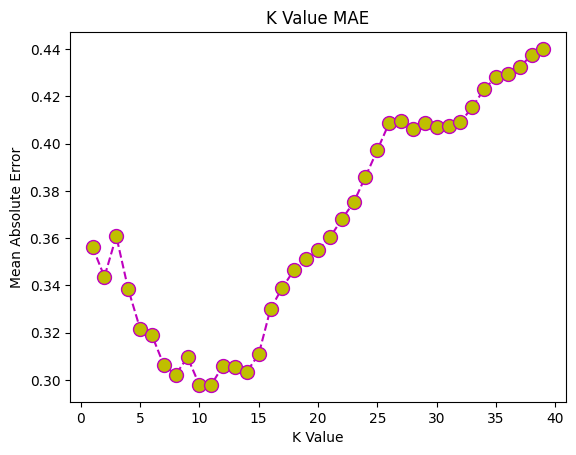

In [ ]:

import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(range(1, 40), error, color='red',
#          linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)

plt.plot(range(1, 40), errorWithWeight, color='m',
         linestyle='dashed', marker='o',
         markerfacecolor='y', markersize=10)

# plt.plot(range(1, 40), errorWith_W_A, color='g',
#          linestyle='dashed', marker='o',
#          markerfacecolor='w', markersize=10)


plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

# print (error)


In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor


model_k = KNeighborsRegressor(n_neighbors=9, weights='distance')#,algorithm='brute'
model_k.fit(x_train,y_train)


predictions = model_k.predict(x_test)
y_train_pred = model_k.predict(x_train)

from sklearn.metrics import mean_squared_error, r2_score
print('R squared on training set:')
print(r2_score(y_train, y_train_pred))

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model_k, data_feature, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE with Orignal data: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f'mae with test data: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

acc =  model_k.score(x_test, y_test)
print(acc)

R squared on training set:
1.0
MAE with Orignal data: 0.128 (0.137)
mae with test data: 0.3096018054823846
mse: 0.4850497754720834
rmse: 0.6924737720566216
0.9499977308331347


In [ ]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == y_test[i][0] and predictions[i][1] == y_test[i][1]):
        over_lap.append(predictions[i])

<ipython-input-15-fd095712aefa>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

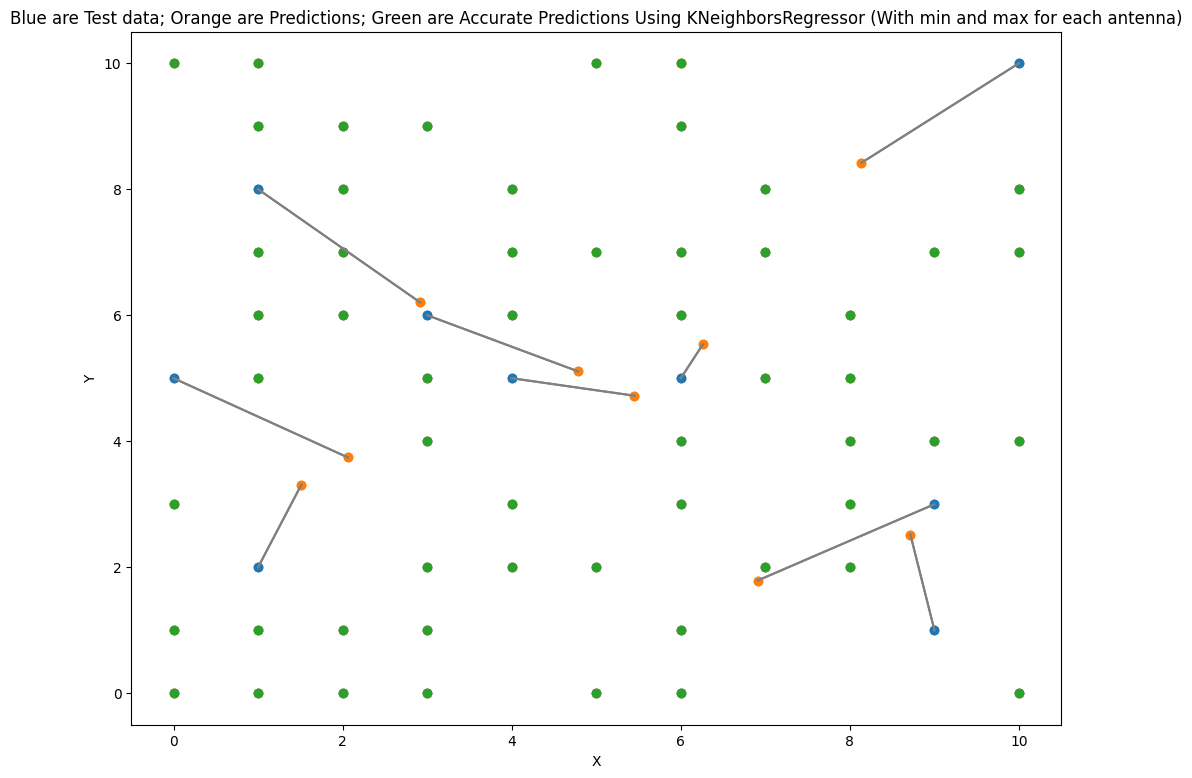

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
plt.scatter(*zip(*over_lap))
for i in range(0, len(y_test)):
    # if (y_test[i][0] == predictions[i][0] and y_test[i][1] == predictions[i][1]) :
    #     plt.plot(predictions[i])
    # else:
    plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

In [ ]:
from sklearn.model_selection import cross_val_score

# for the knn Classifier:
scores = cross_val_score(model_k, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)

knn_rmse_scores = np.sqrt(-scores)

print('Scores: {}\nMean: {}\nStandard deviation: {}'.format(
    knn_rmse_scores, knn_rmse_scores.mean(), knn_rmse_scores.std()))

Scores: [1.04491008 1.36344585 1.4321851  1.46399113 1.48666392]
Mean: 1.3582392180076506
Standard deviation: 0.16207814497607798


**DecisionTreeRegressor**

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_regression
from sklearn.tree  import DecisionTreeRegressor

# define base model
model_DT = DecisionTreeRegressor()


model_DT.fit(x_train,y_train)
model_DT.score(x_train,y_train)

predictions = model_DT.predict(x_test)
y_train_pred = model_DT.predict(x_train)

from sklearn.metrics import mean_squared_error, r2_score
print('R squared on training set:')
print(r2_score(y_train, y_train_pred))

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model_DT, data_feature, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

acc =  model_DT.score(x_test, y_test)
print(acc)

R squared on training set:
1.0
MAE: 0.205 (0.225)
mae: 0.7808219178082192
mse: 3.3835616438356166
rmse: 1.8231651240182076
0.6446377477405438


In [ ]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == y_test[i][0] and predictions[i][1] == y_test[i][1]):
        over_lap.append(predictions[i])

<ipython-input-25-72676e21eebf>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using DecisionTreeRegressor (with line)')

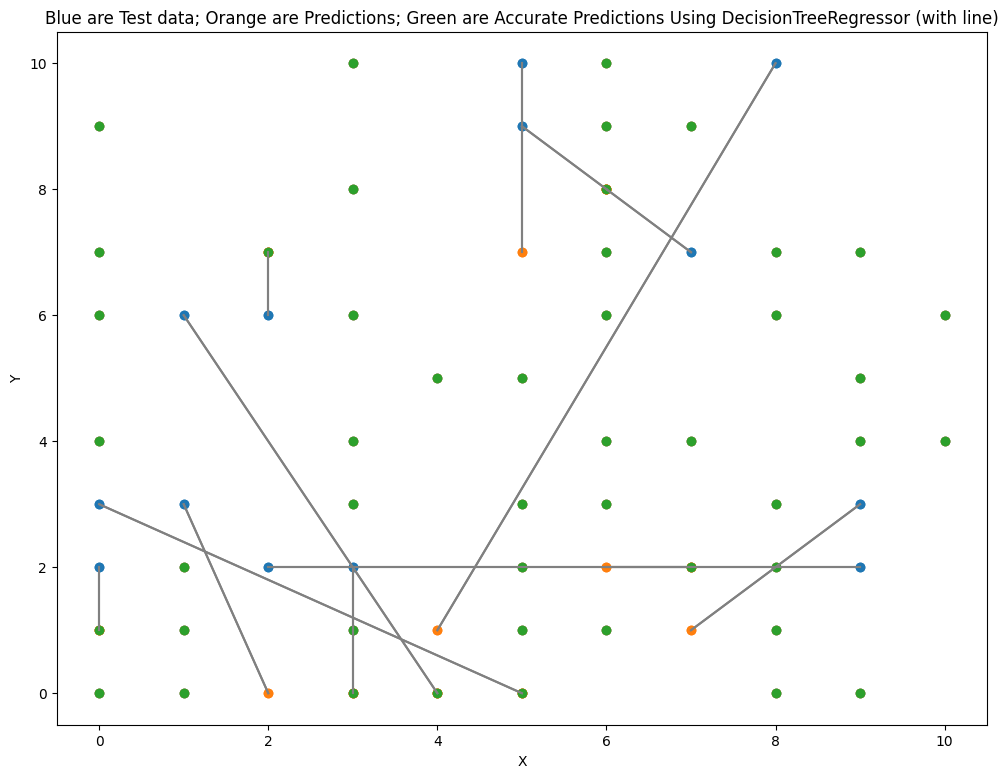

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
plt.scatter(*zip(*over_lap))
for i in range(0, len(y_test)):
    plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using DecisionTreeRegressor (with line)')

In [ ]:
y_test = np.array(y_test)
for i in range(len(predictions)):
  print(np.floor(predictions[i]),y_test[i])

[4. 0.] [1 6]
[7. 1.] [9 3]
[6. 8.] [7 7]
[3. 3.] [3 3]
[8. 2.] [8 2]
[6. 2.] [9 2]
[4. 0.] [1 6]
[9. 5.] [9 5]
[7. 4.] [7 4]
[1. 2.] [1 2]
[0. 0.] [0 0]
[5. 7.] [ 5 10]
[6. 6.] [6 6]
[6. 8.] [5 9]
[4. 1.] [ 8 10]
[3. 8.] [3 8]
[6. 1.] [6 1]
[5. 0.] [5 0]
[5. 0.] [0 3]
[5. 2.] [5 2]
[8. 7.] [8 7]
[3. 1.] [3 1]
[1. 0.] [1 0]
[9. 0.] [9 0]
[0. 1.] [0 2]
[6. 2.] [9 2]
[7. 2.] [7 2]
[2. 7.] [2 6]
[3. 0.] [3 0]
[4. 5.] [4 5]
[4. 1.] [ 8 10]
[6. 4.] [6 4]
[0. 9.] [0 9]
[3. 0.] [3 2]
[6. 8.] [6 8]
[8. 3.] [8 3]
[9. 7.] [9 7]
[2. 7.] [2 6]
[8. 1.] [8 1]
[7. 2.] [2 2]
[6. 8.] [5 9]
[7. 9.] [7 9]
[ 6. 10.] [ 6 10]
[3. 6.] [3 6]
[3. 4.] [3 4]
[2. 0.] [1 3]
[5. 0.] [0 3]
[6. 3.] [6 3]
[5. 3.] [5 3]
[0. 1.] [0 2]
[7. 1.] [9 3]
[0. 6.] [0 6]
[0. 1.] [0 1]
[6. 7.] [6 7]
[1. 1.] [1 1]
[0. 7.] [0 7]
[8. 0.] [8 0]
[5. 5.] [5 5]
[6. 9.] [6 9]
[9. 4.] [9 4]
[2. 0.] [1 3]
[7. 2.] [2 2]
[5. 7.] [ 5 10]
[6. 8.] [7 7]
[10.  6.] [10  6]
[5. 1.] [5 1]
[2. 7.] [2 7]
[3. 0.] [3 2]
[ 3. 10.] [ 3 10]
[4. 0.] [4 0]


**LinearRegression Model**

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# define base model
model_LR = LinearRegression()


model_LR.fit(x_train,y_train)
model_LR.score(x_train,y_train)

predictions = model_LR.predict(x_test)
y_train_pred = model_LR.predict(x_train)

from sklearn.metrics import mean_squared_error, r2_score
print('R squared on training set:')
print(r2_score(y_train, y_train_pred))

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model_LR, data_feature, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(x_test.head())
acc =  model_LR.score(x_test, y_test)
print(acc)

R squared on training set:
0.6749412919711792
MAE: 1.438 (0.168)
mae: 1.4312128518263865
mse: 4.1397358777009075
rmse: 2.0345329676393016
            0         1         2         3         4         5         6  \
71   0.004341  0.370492  0.040438  0.028044  0.025025  0.094771  0.028066   
36   0.020627  0.181232  0.009390  0.326825  0.018491  0.095988  0.017581   
84   0.053842  0.174901  0.037251  0.111205  0.014977  0.060649  0.025149   
34   0.008767  0.519955  0.024913  0.035654  0.025445  0.018999  0.034219   
144  0.027023  0.209723  0.002706  0.413413  0.028818  0.105454  0.025282   

            7  
71   0.045599  
36   0.176290  
84   0.025268  
34   0.049841  
144  0.096427  
0.5671510870308287


In [ ]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == y_test[i][0] and predictions[i][1] == y_test[i][1]):
        over_lap.append(predictions[i])
over_lap

[]

<ipython-input-29-8c59783af347>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions Using LinearRegression (with line)')

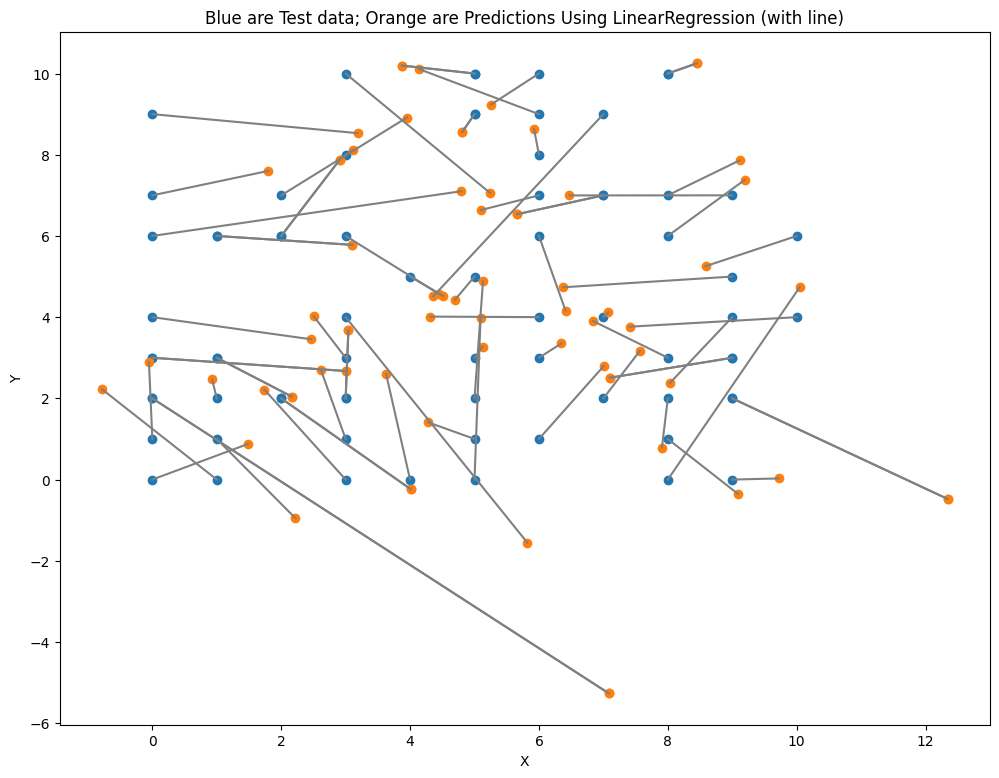

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
#plt.scatter(*zip(*over_lap))
for i in range(0, len(y_test)):
    plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions Using LinearRegression (with line)')

In [ ]:
y_test = np.array(y_test)
for i in range(len(predictions)):
  print(np.floor(predictions[i]),y_test[i])